<a href="https://colab.research.google.com/github/med-fakil/ML-AMCHD-/blob/main/Mini_projet_ML(tentative%204).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pathlib
import os

import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
data_dir = '/content/drive/MyDrive/archive.zip'
import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

In [30]:
data_dir = pathlib.Path('/content/datasets/AMHCD_64/AMHCD_64')
print("Le répertoire de données : {} ".format(data_dir))

Le répertoire de données : /content/datasets/AMHCD_64/AMHCD_64 


In [31]:
image_count = len(list(data_dir.glob('*/*')))
print("Nombre des images de la base de données : {} ".format(image_count))

Nombre des images de la base de données : 25740 


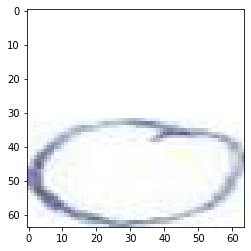

In [32]:
#Exemple d'une image
image = plt.imread("/content/datasets/AMHCD_64/AMHCD_64/ya/ya_1.jpeg")
plt.imshow(image)

In [33]:
#Dimension des image
image.shape

(64, 64, 3)

In [34]:
#Taille des images
img_height = 32
img_width = 32

In [35]:
# train_data est un objet tensor, chaque élement est un tuple (image,label) 
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  #batch_size=batch_size,
  )


Found 25740 files belonging to 33 classes.
Using 20592 files for training.


In [36]:
# val_data est un objet tensor, chaque élement est un tuple (image,label) 
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  #batch_size=batch_size,
  )

Found 25740 files belonging to 33 classes.
Using 5148 files for validation.


In [37]:
class_names = val_data.class_names
print("Les classes :")
print(class_names)
print("Nombre de classe : {} ".format(len(class_names)))

Les classes :
['ya', 'yab', 'yach', 'yad', 'yadd', 'yae', 'yaf', 'yag', 'yagh', 'yagw', 'yah', 'yahh', 'yaj', 'yak', 'yakw', 'yal', 'yam', 'yan', 'yaq', 'yar', 'yarr', 'yas', 'yass', 'yat', 'yatt', 'yaw', 'yax', 'yay', 'yaz', 'yazz', 'yey', 'yi', 'yu']
Nombre de classe : 33 


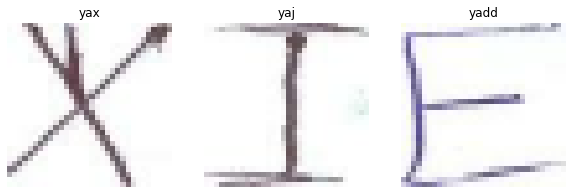

In [38]:
#Visualiser qlq données
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [40]:
num_classes = 33

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32,(3,3), padding='same',activation='relu',input_shape=(32, 32, 3)),

    layers.Conv2D(32,(3,3),padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(rate=0.5),

    layers.Conv2D(64,(3,3), padding='same',activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(rate=0.5),
    
    layers.Flatten(),

    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [41]:
model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=0.001),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

logdir="logs"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,
                                                   histogram_freq=1, 
                                                   write_images=logdir,
                                                   embeddings_data=train_data)


historique = model.fit( 
             train_data,
             validation_data=val_data,
             epochs=40,
             callbacks=[tensorboard_callback]
)

Epoch 1/40
644/644 [==============================] - 60s 92ms/step - loss: 1.3958 - accuracy: 0.6203 - val_loss: 0.2540 - val_accuracy: 0.9250
Epoch 2/40
644/644 [==============================] - 60s 93ms/step - loss: 0.2077 - accuracy: 0.9390 - val_loss: 0.1219 - val_accuracy: 0.9685
Epoch 3/40
644/644 [==============================] - 58s 90ms/step - loss: 0.1245 - accuracy: 0.9660 - val_loss: 0.0648 - val_accuracy: 0.9814
Epoch 4/40
644/644 [==============================] - 60s 93ms/step - loss: 0.0912 - accuracy: 0.9737 - val_loss: 0.0456 - val_accuracy: 0.9883
Epoch 5/40
644/644 [==============================] - 59s 92ms/step - loss: 0.0757 - accuracy: 0.9772 - val_loss: 0.0466 - val_accuracy: 0.9897
Epoch 6/40
644/644 [==============================] - 61s 94ms/step - loss: 0.0644 - accuracy: 0.9810 - val_loss: 0.0498 - val_accuracy: 0.9878
Epoch 7/40
644/644 [==============================] - 61s 95ms/step - loss: 0.0560 - accuracy: 0.9844 - val_loss: 0.0507 - val_accuracy:

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                      

In [43]:
import pandas as pd
metrics = pd.DataFrame(historique.history)

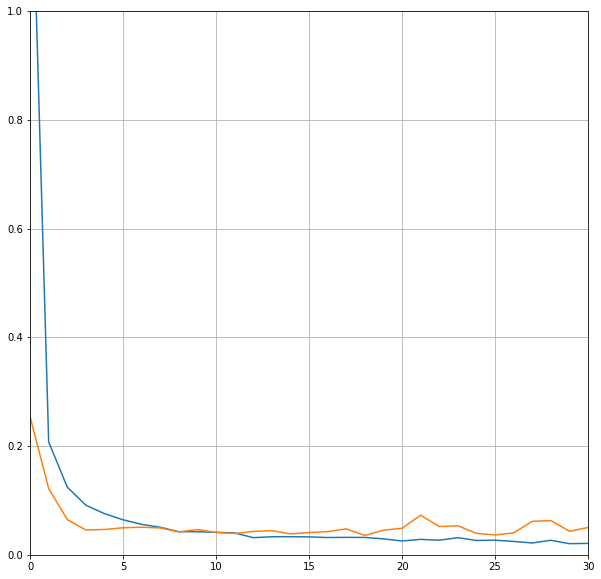

In [44]:
plt.figure(figsize=(10,10))
plt.ylim([0,1])
plt.xlim([0,30])
plt.plot(metrics[["loss","val_loss"]])
plt.grid(True)
plt.show()

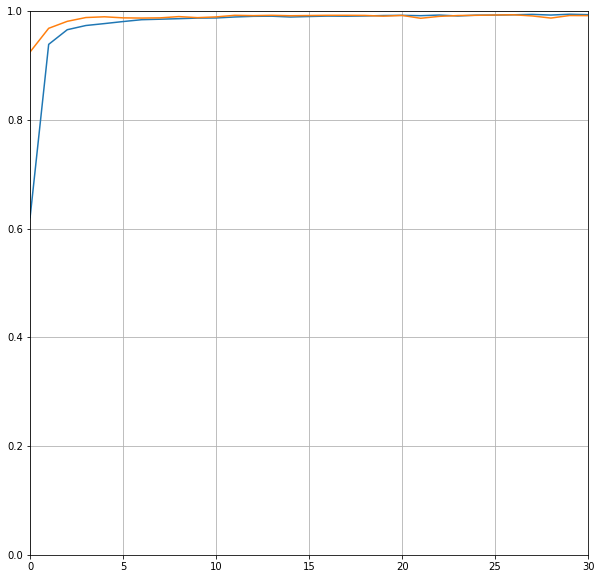

In [45]:
plt.figure(figsize=(10,10))
plt.ylim([0,1])
plt.xlim([0,30])
plt.plot(metrics[["accuracy","val_accuracy"]])
plt.grid(True)
plt.show()

In [ ]:
#--------------------------------------------------------------------------------------------------------------

In [ ]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [ ]:
def create_model():
  # create model
  model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32,(3,3), activation='relu',input_shape=(32, 32, 3)),

  layers.Conv2D(32,(3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(rate=0.5),

  layers.Conv2D(64,(3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(rate=0.5),
    
  layers.Flatten(),

  layers.Dense(64,activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])
   
	# Compile model
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=0.001),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  
  return model

In [ ]:
data_labels=[]
data_images=[]
for images, labels in train_data.unbatch():
    data_labels.append(labels)
    data_images.append(images)

    

In [ ]:
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

model = KerasClassifier(model=create_model, verbose=0)

# define the grid search parameters
#batch_size = [10, 20, 40, 60, 80, 100]
epochs = [20, 30,40,50]

param_grid = dict(epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(data_images,data_labels)


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/scikeras/wrappers.py", l

TypeError: ignored

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
